# Model Training for student performance

In [16]:
# importng all the important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')


In [2]:
#Importing data set
df = pd.read_csv('StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
#Getting Target column and other variables
X = df.drop(columns=['math score'],axis=1)

In [6]:
#checking first 5 rows
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [7]:
y = df['math score']
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math score, dtype: int64

In [10]:
X.shape


(1000, 7)

In [9]:
y.shape

(1000,)

In [11]:
#Checking for categories in dataset

print(f"Categories in gender : {df['gender'].unique()}")
print(f"Categories in race/ethnicity : {df['race/ethnicity'].unique()}")
print(f"Categories in parental level of education : {df['parental level of education'].unique()}")
print(f"Categories in lunch : {df['lunch'].unique()}")
print(f"Categories in test preparation course : {df['test preparation course'].unique()}")

Categories in gender : ['female' 'male']
Categories in race/ethnicity : ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental level of education : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch : ['standard' 'free/reduced']
Categories in test preparation course : ['none' 'completed']


In [13]:
#Seperating Numerical and categorical features, column transformation
num_features=X.select_dtypes(exclude="object").columns
cat_features=X.select_dtypes(include="object").columns

num_transformer= StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor =ColumnTransformer(
    [
    ("OneHotEncoder",oh_transformer,cat_features),
    ("StandardScaler",num_transformer,num_features),
    ]
)

In [14]:
X=preprocessor.fit_transform(X)

In [15]:
X.shape

(1000, 19)

# Train and Test dataset

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [18]:
X_train.shape

(800, 19)

In [19]:
X_test.shape

(200, 19)

# A function to give all metrics after model training

In [20]:
def evaluate_model(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rsme = np.sqrt(mse)
    r2_square = r2_score(true,predicted)
    return mae,mse,rsme,r2_square

In [25]:
models = {
    "Linear Regression":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "K-Neighbors Regressor":KNeighborsRegressor(),
    "Decision Tree":DecisionTreeRegressor(),
    "Random Forest":RandomForestRegressor(),
    "XGBRegressor":XGBRegressor(),
    "CatBoost Regressor":CatBoostRegressor(verbose=False),
    "AdaBoost Regressor":AdaBoostRegressor()
}

model_list=[]
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    #model training
    model.fit(X_train,y_train)

    #model Prediction
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    #Evaluate train and test dataset
    model_train_mae, model_train_mse, model_train_rsme, model_train_r2 = evaluate_model(y_train,y_train_pred)
    model_test_mae, model_test_mse, model_test_rsme, model_test_r2 = evaluate_model(y_test,y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("model performance for training set")
    print(f"- Root mean squared error:  {model_train_rsme}")
    print(f"- Mean absolute error:  {model_train_mae}")
    print(f"- r2 score:  {model_train_r2}")

    print(" - " *30)

    print("model performance for test set")
    print(f"- Root mean squared error:  {model_test_rsme}")
    print(f"- Mean absolute error:  {model_test_mae}")
    print(f"- r2 score:  {model_test_r2}")
    r2_list.append(model_test_r2)

    print("="*35)
    print('\n')



Linear Regression
model performance for training set
- Root mean squared error:  5.327574803199989
- Mean absolute error:  4.27673828125
- r2 score:  0.8741034828325389
 -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
model performance for test set
- Root mean squared error:  5.409019341283131
- Mean absolute error:  4.2259375
- r2 score:  0.8797662422602639


Lasso
model performance for training set
- Root mean squared error:  6.593815587795566
- Mean absolute error:  5.206302661246526
- r2 score:  0.8071462015863456
 -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
model performance for test set
- Root mean squared error:  6.519694535667421
- Mean absolute error:  5.157881810347763
- r2 score:  0.8253197323627852


Ridge
model performance for training set
- Root mean squared error:  5.323324922741654
- Mean absolute error:  4.264987823725981
- r2 score:  0.8743042615212909
 -  -  -  -  -  -  -  -  -  -

# result

In [26]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=["Model Name","R2_score"]).sort_values(by=["R2_score"],ascending=False)

,Model Name,R2_score
2,Ridge,0.880593
0,Linear Regression,0.879766
5,Random Forest,0.853836
7,CatBoost Regressor,0.851632
8,AdaBoost Regressor,0.851588
1,Lasso,0.825320
6,XGBRegressor,0.821589
3,K-Neighbors Regressor,0.783813
4,Decision Tree,0.731382


# Ridge

In [27]:
ridge_model = Ridge(fit_intercept=True)
ridge_model = ridge_model.fit(X_train,y_train)
y_pred = ridge_model.predict(X_test)
score = r2_score(y_test,y_pred)*100
print(f" Accuracy of the model is: {score}")

 Accuracy of the model is: 88.05931485028738


# Plot y_pred and y_test

Text(0, 0.5, 'Predicted')

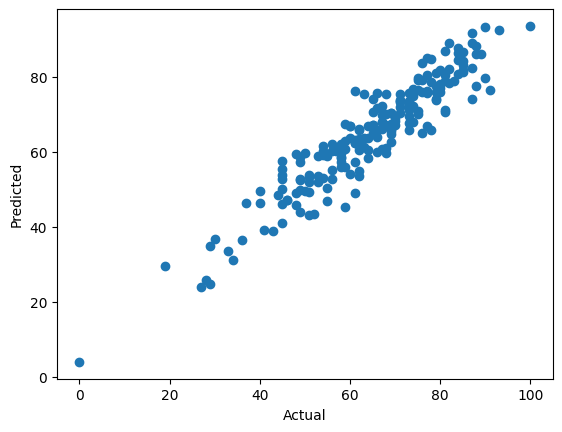

In [28]:
plt.scatter(y_test,y_pred);
plt.xlabel("Actual")
plt.ylabel("Predicted")


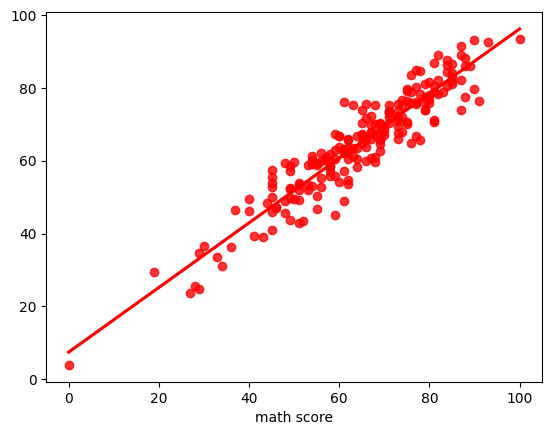

In [29]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='red');

# Difference between actual and predicted value

In [30]:
pred_dif = pd.DataFrame({'Actual_value':y_test,'Predicted_value':y_pred,'Difference':y_test-y_pred})

In [31]:
pred_dif

,Actual_value,Predicted_value,Difference
521,91,76.398705,14.601295
737,53,58.842469,-5.842469
740,80,76.992129,3.007871
660,74,76.805898,-2.805898
411,84,87.615387,-3.615387
...,...,...,...
408,52,43.492293,8.507707
332,62,62.170763,-0.170763
208,74,67.910325,6.089675
613,65,67.061504,-2.061504


In [1]:
pip install -U notebook-as-pdf

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pyppeteer

Note: you may need to restart the kernel to use updated packages.
